In [1]:
import pandas as pd
import json

import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("../results/test/results.csv", index_col=0)
data.set_index("task", inplace=True)
data = data.assign(target=data.groupby(level="task").epoch.max(),
                   cumcost=data.cost.cumsum(),
                   best=data.error.cummin(),
                   regret=data.error-0.22137885).reset_index()
data = data.assign(best_regret=data.regret.cummin())
data

,task,bracket,epoch,error,cost,submitted,runtime,target,cumcost,best,regret,best_regret
0,0,0,3,0.405369,14.694887,0.000921,0.025063,11,14.694887,0.405369,0.183990,0.183990
1,0,0,11,0.372510,53.881252,0.546435,0.553921,11,68.576138,0.372510,0.151131,0.151131
2,1,0,3,0.488138,3.242184,0.027020,0.032158,3,71.818322,0.372510,0.266759,0.151131
3,2,0,3,0.472871,2.500380,0.034122,0.040735,3,74.318702,0.372510,0.251492,0.151131
4,3,0,3,0.564182,2.148454,0.042797,0.049067,3,76.467156,0.372510,0.342803,0.151131
...,...,...,...,...,...,...,...,...,...,...,...,...
178,125,9,11,0.445403,14.378188,5.680391,5.686226,11,12309.976704,0.255834,0.224024,0.034455
179,126,9,11,0.425317,30.547528,5.687783,5.693947,11,12340.524232,0.255834,0.203938,0.034455
180,127,9,11,0.327813,22.792084,5.696205,5.701787,100,12363.316316,0.255834,0.106435,0.034455
181,127,9,33,0.282011,67.791213,5.721010,5.726364,100,12431.107528,0.255834,0.060632,0.034455


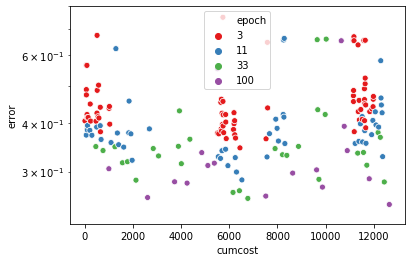

In [20]:
fig, ax = plt.subplots()

sns.scatterplot(x="cumcost", y="error", hue="epoch", # units="task", estimator=None, 
                palette="Set1", data=data, ax=ax)

ax.set_ylim(0.22, 0.8)
ax.set_yscale("log")

plt.show()

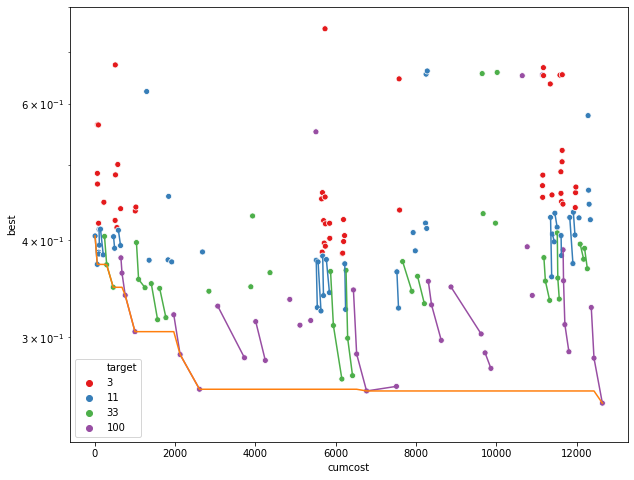

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x="cumcost", y="error", hue="target",
                palette="Set1", data=data, ax=ax)
sns.lineplot(x="cumcost", y="error", hue="target",
             units="task", estimator=None, legend=False,
             palette="Set1", data=data, ax=ax)
sns.lineplot(x="cumcost", y="best", data=data, ax=ax)

ax.set_ylim(0.22, 0.8)
ax.set_yscale("log")

plt.show()

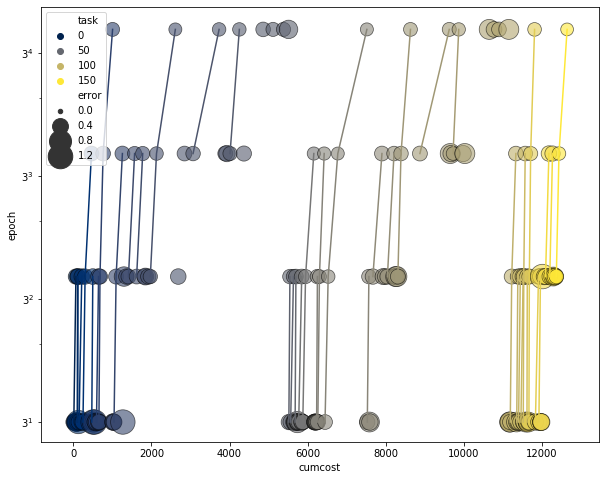

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.lineplot(x="cumcost", y="epoch", hue="task", palette="cividis",
             legend=False, data=data, ax=ax)
sns.scatterplot(x="cumcost", y="epoch", hue="task", palette="cividis", 
                size="error", sizes=(20, 600), size_norm=(0.0, 1.0), 
                data=data, edgecolor="k", alpha=0.6, ax=ax)

ax.set_yscale('log', basey=3)

plt.show()

In [23]:
data.error.cummin()

0      0.405369
1      0.372510
2      0.372510
3      0.372510
4      0.372510
         ...   
178    0.255834
179    0.255834
180    0.255834
181    0.255834
182    0.246745
Name: error, Length: 183, dtype: float64

In [24]:
d = pd.read_json("../results/test/results.json")
d

,regret_validation,regret_test,runtime
0,0.183990,0.106440,14.694887
1,0.183990,0.106440,17.937071
2,0.183990,0.106440,20.437450
3,0.183990,0.106440,22.585904
4,0.183990,0.106440,43.229160
...,...,...,...
178,0.034455,0.039009,12207.606312
179,0.034455,0.039009,12294.083281
180,0.034455,0.039009,12363.316316
181,0.034455,0.039009,12431.107528


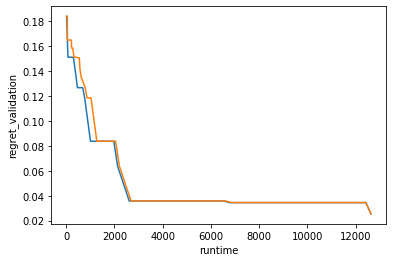

In [25]:
fig, ax = plt.subplots()

sns.lineplot(x="cumcost", y="best_regret", data=data, ax=ax)
sns.lineplot(x="runtime", y="regret_validation", data=d, ax=ax)

# ax.set_xscale("log")
# ax.set_yscale("log")

plt.show()